## Medical Cost Personal DatasetsInsurance Forecast by using Linear Regression


Content
Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

Acknowledgements
The dataset is available on GitHub here.

Inspiration
Can you accurately predict insurance costs?

In [3]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [4]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Text(0.5, 1.0, 'Charge Vs BMI')

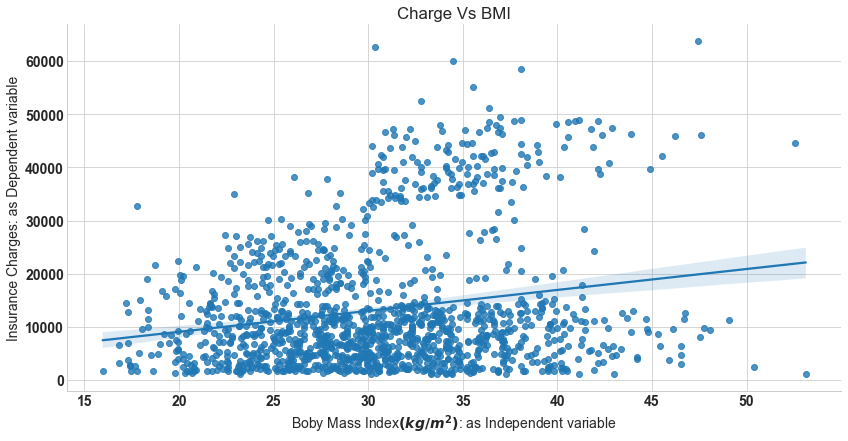

In [6]:
#check for reggresion line fit
sns.lmplot(x ='bmi', y = 'charges', data = df, aspect =2,height = 6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI')


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#missing value analysis
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

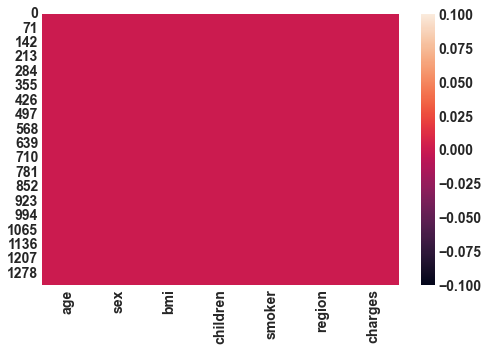

In [9]:
sns.heatmap(df.isnull())

In [10]:
#corrliation 
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

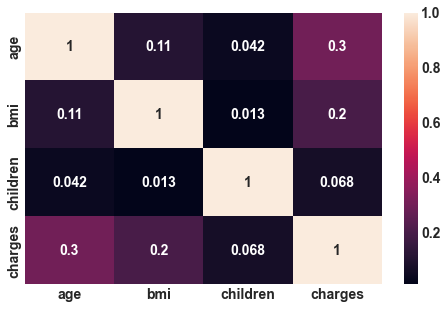

In [11]:
sns.heatmap(df.corr(),annot =True)

In [12]:
#some corr bw age and bmi 
#bmi and age has corr with chage

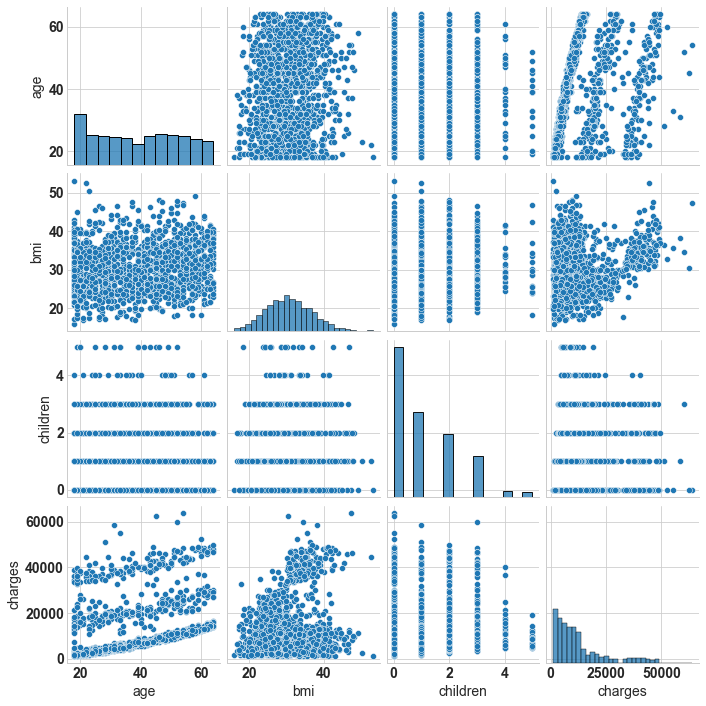

In [13]:
sns.pairplot(df)

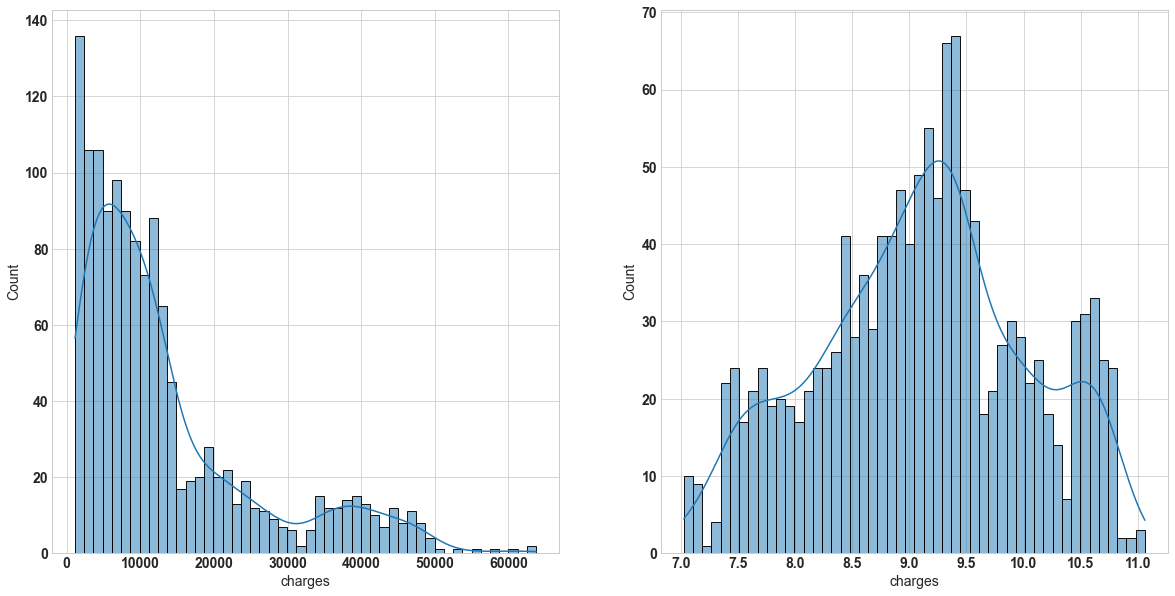

In [14]:
#charges has skewd distriburtion and not normal
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(df.charges, kde =True, bins =50)
plt.subplot(1,2,2)
sns.histplot(np.log(df.charges), kde =True, bins =50)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


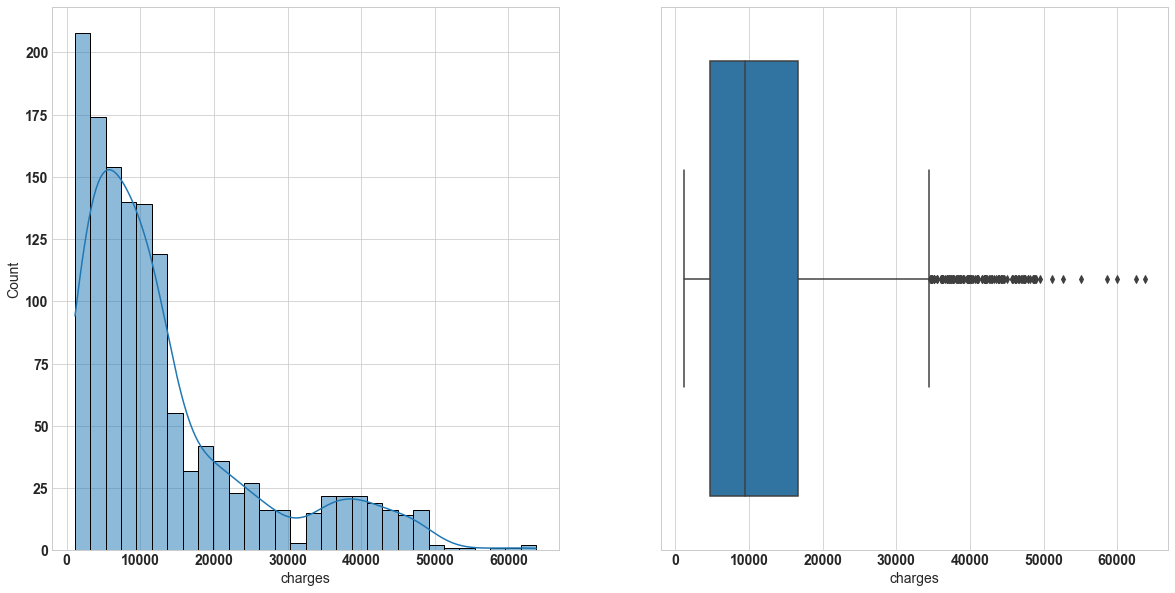

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(df.charges, kde =True, bins =30)
plt.subplot(1,2,2)
sns.boxplot(df.charges)
plt.show()

In [16]:
df.describe(percentiles= [0,0.25,.5,.75,.8])['charges']

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
0%        1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
80%      20260.626406
max      63770.428010
Name: charges, dtype: float64

In [18]:
#there is a diff bw mean and median 
#80% of the charges are below 20k only 15% are bw 20k and 63k

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


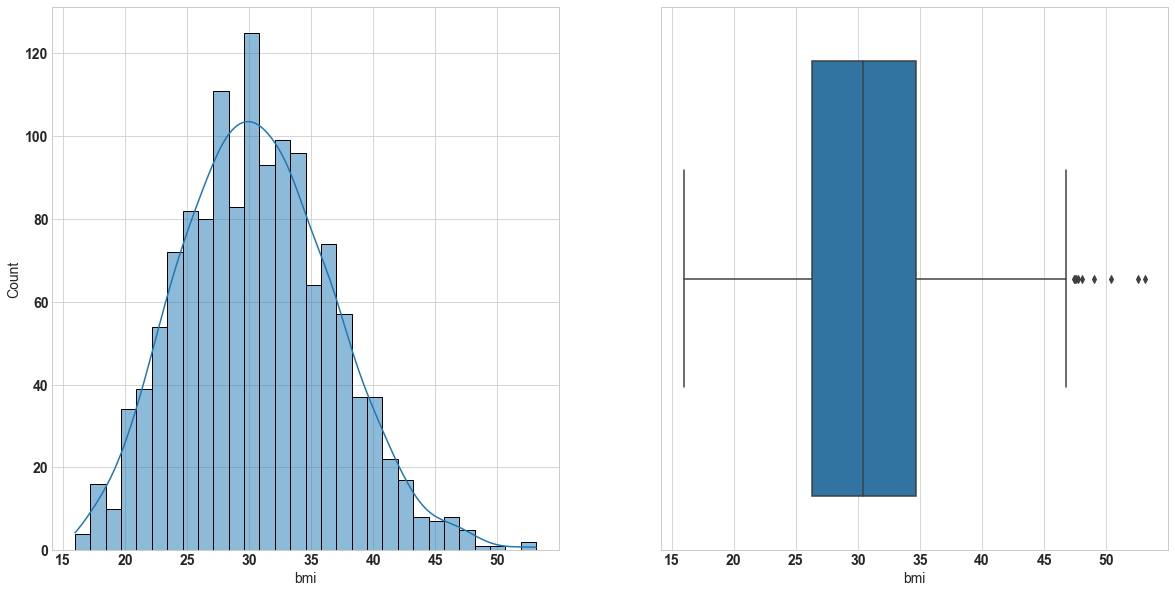

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(df.bmi, kde =True, bins =30)
plt.subplot(1,2,2)
sns.boxplot(df.bmi)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


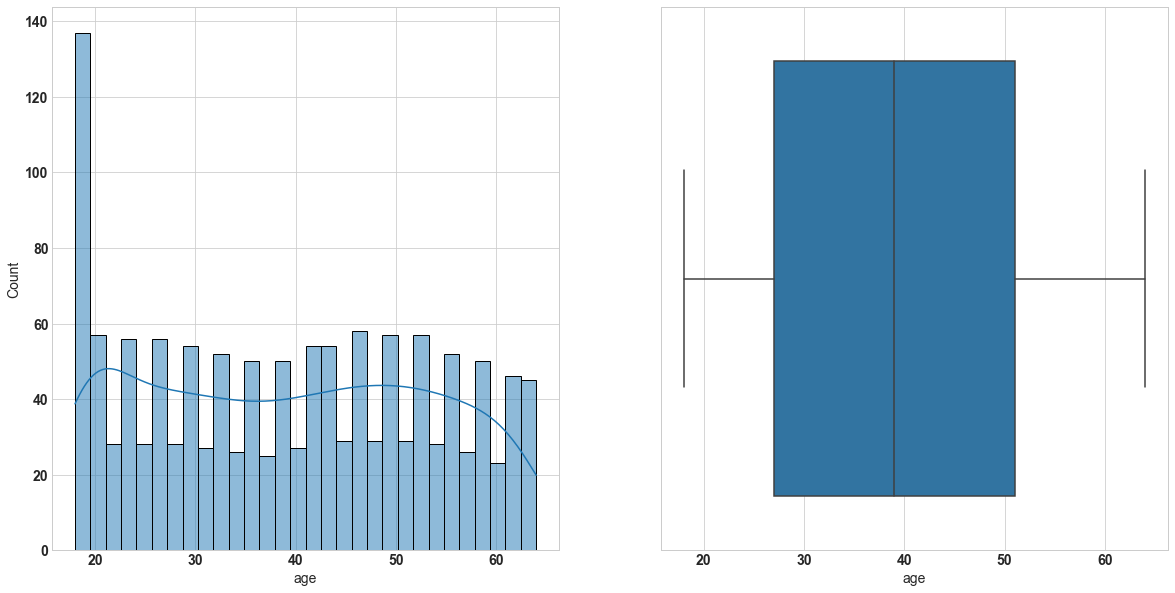

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(df.age, kde =True, bins =30)
plt.subplot(1,2,2)
sns.boxplot(df.age)
plt.show()

In [21]:
#categorical data analysis

df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [22]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [23]:
df.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

<AxesSubplot:xlabel='sex'>

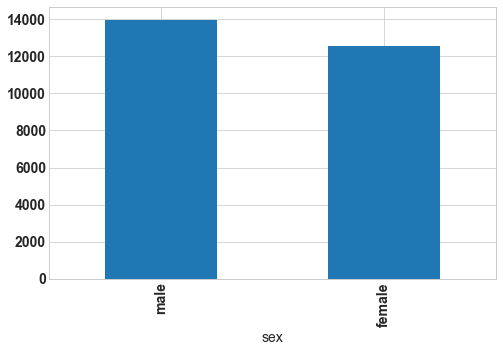

In [24]:
df.groupby('sex')['charges'].mean().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

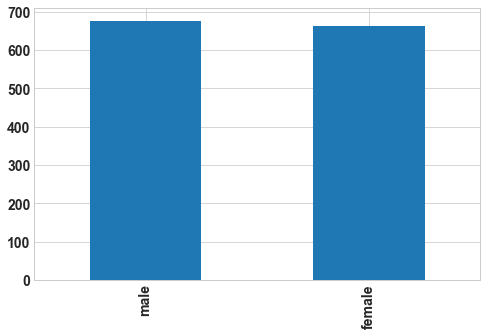

In [25]:
df.sex.value_counts().plot(kind = 'bar')

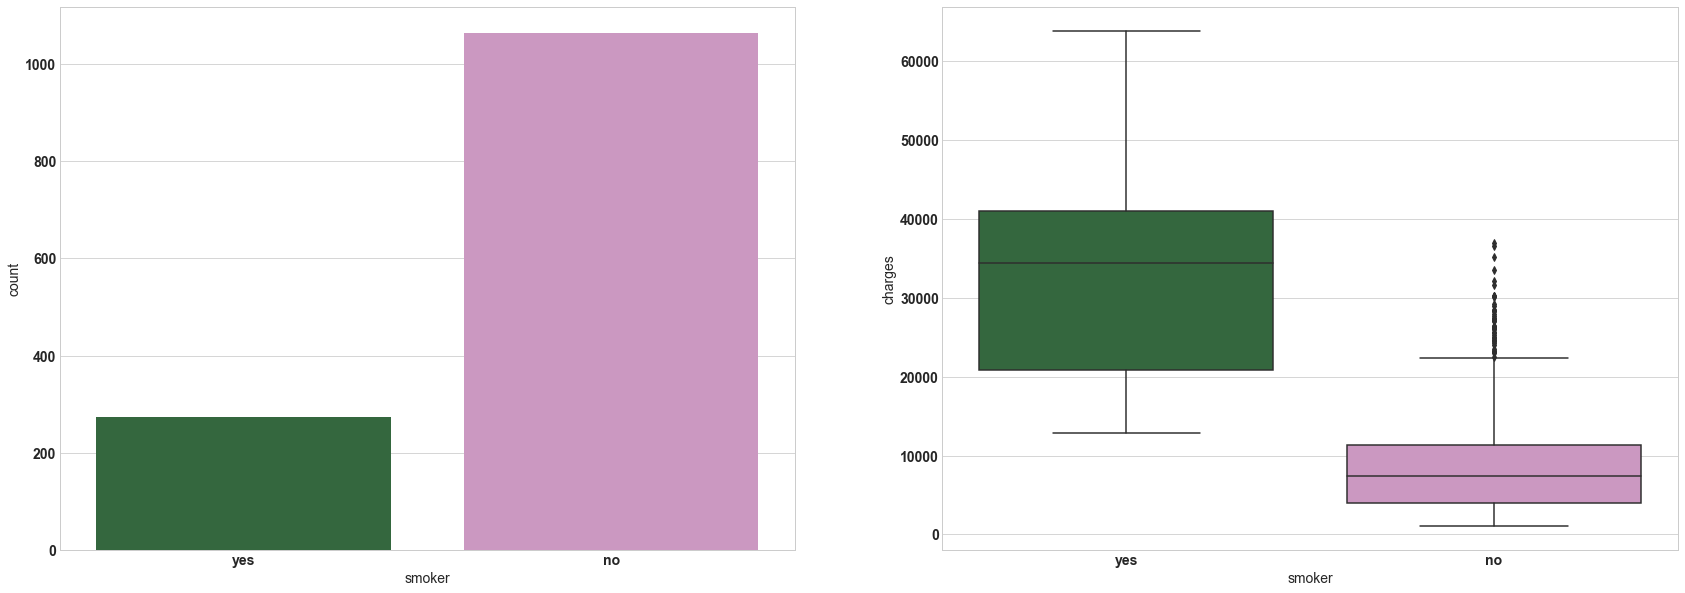

In [26]:
plt.figure(figsize=(29,10))
plt.subplot(1,2,1)
sns.countplot(x = df.smoker, palette=("cubehelix"))
plt.subplot(1,2,2)
sns.boxplot(x = df.smoker, y = df.charges,palette=("cubehelix"))
plt.show()

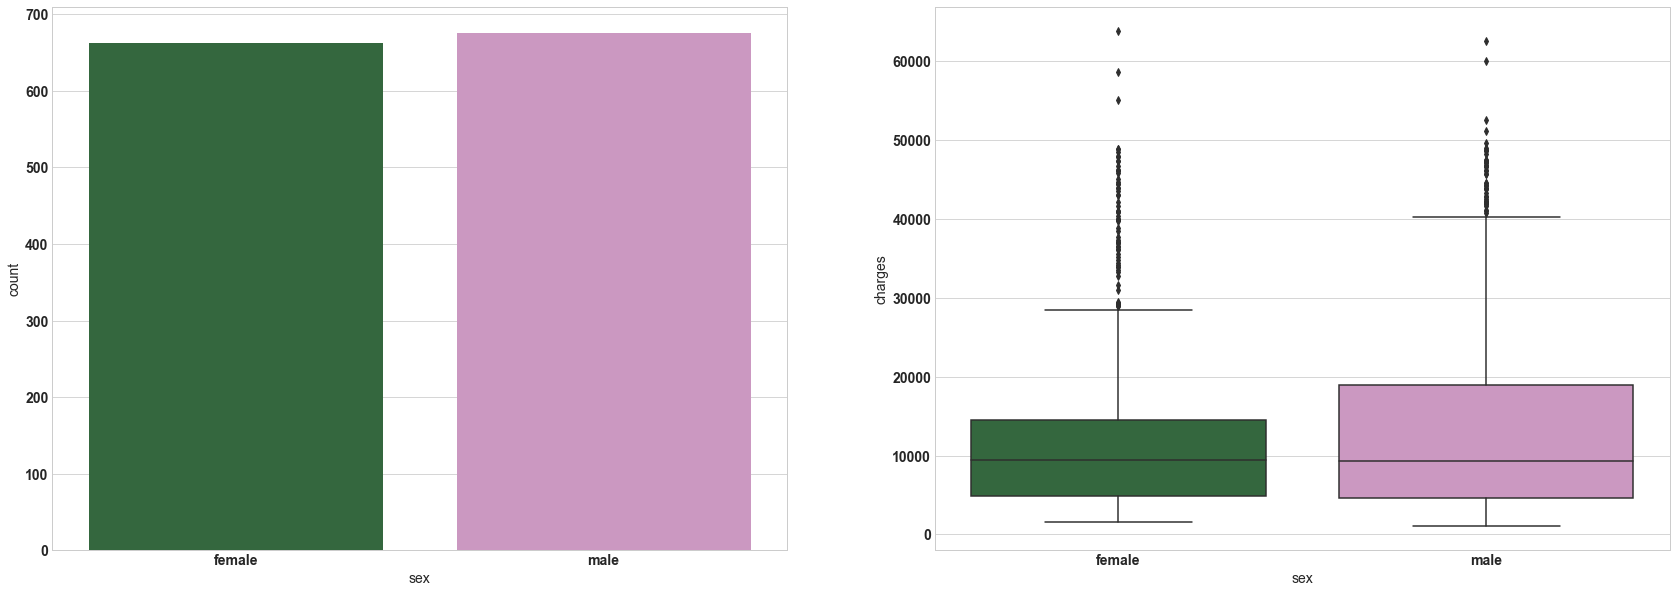

In [27]:
plt.figure(figsize=(29,10))
plt.subplot(1,2,1)
sns.countplot(x = df.sex, palette=("cubehelix"))
plt.subplot(1,2,2)
sns.boxplot(x = df.sex, y = df.charges,palette=("cubehelix"))
plt.show()

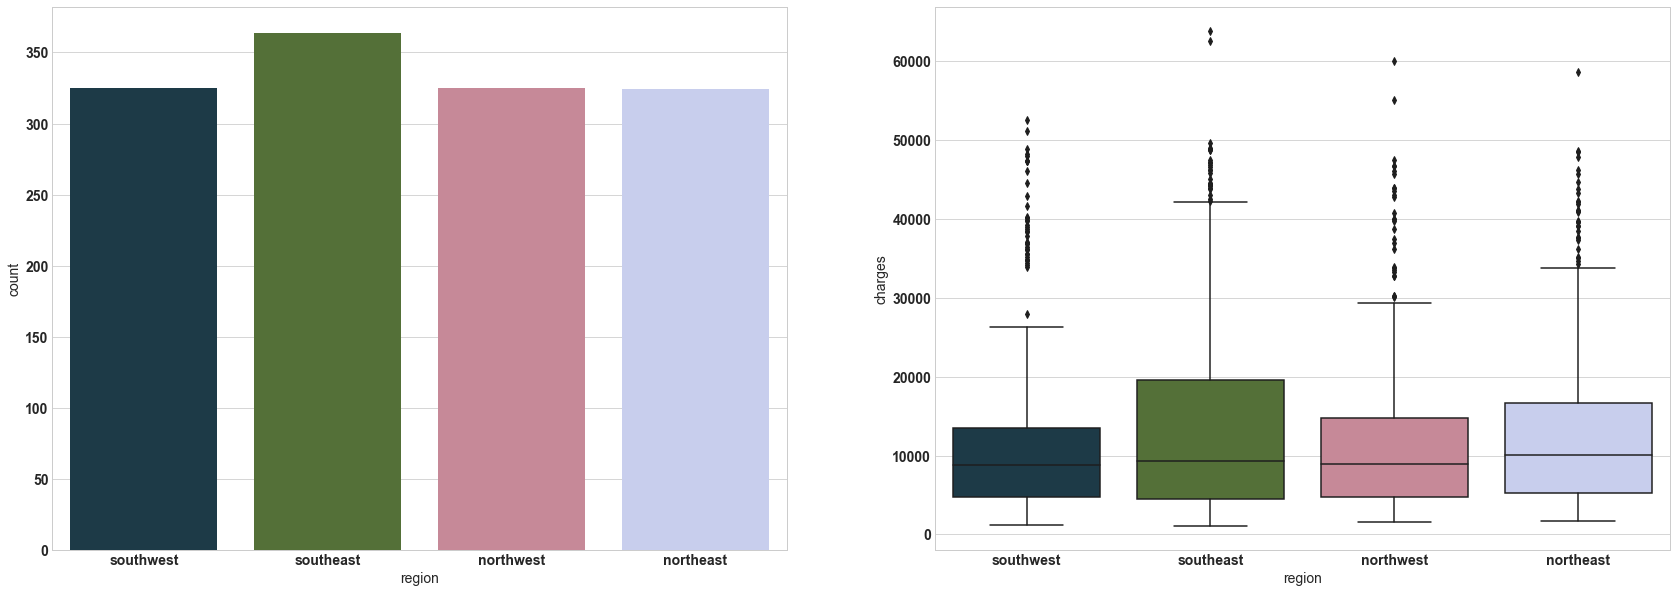

In [28]:
plt.figure(figsize=(29,10))
plt.subplot(1,2,1)
sns.countplot(x = df.region, palette=("cubehelix"))
plt.subplot(1,2,2)
sns.boxplot(x = df.region, y = df.charges,palette=("cubehelix"))
plt.show()

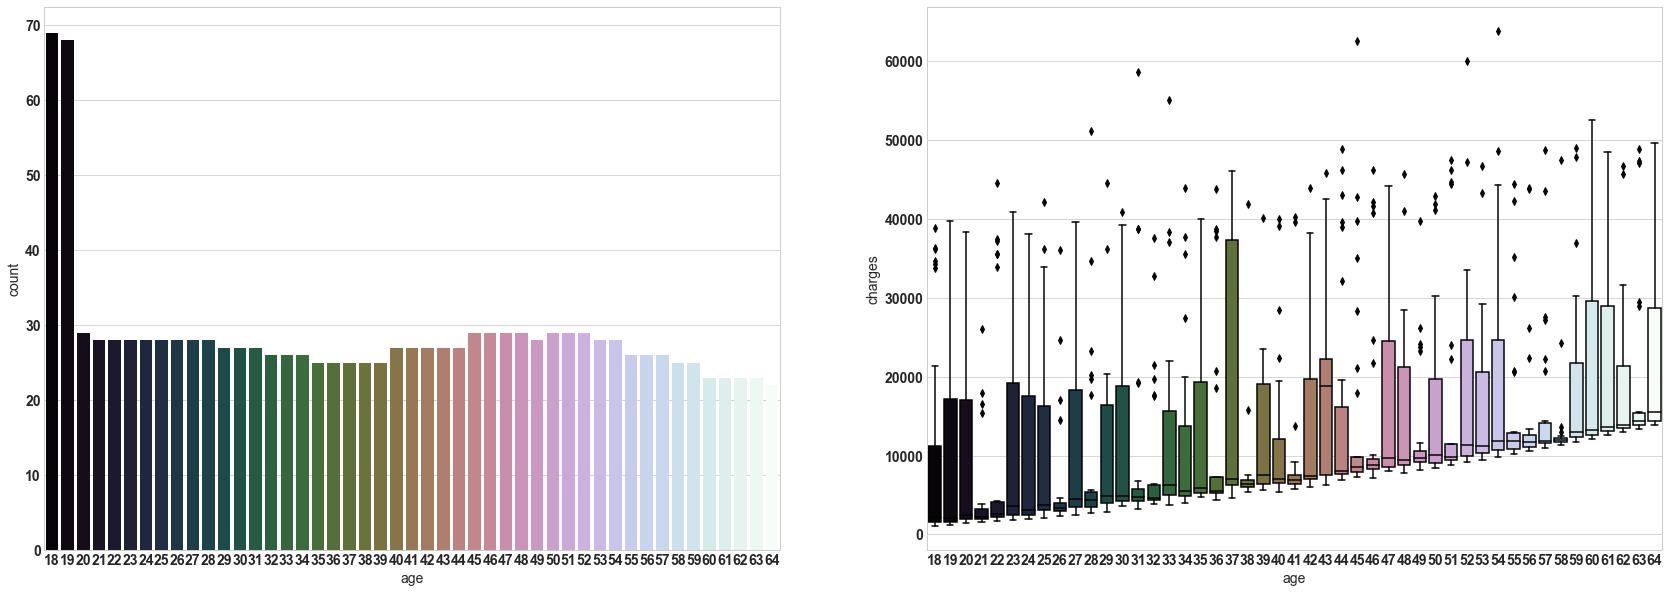

In [29]:
plt.figure(figsize=(29,10))
plt.subplot(1,2,1)
sns.countplot(x = df.age, palette=("cubehelix"))
plt.subplot(1,2,2)
sns.boxplot(x = df.age, y = df.charges,palette=("cubehelix"))
plt.show()

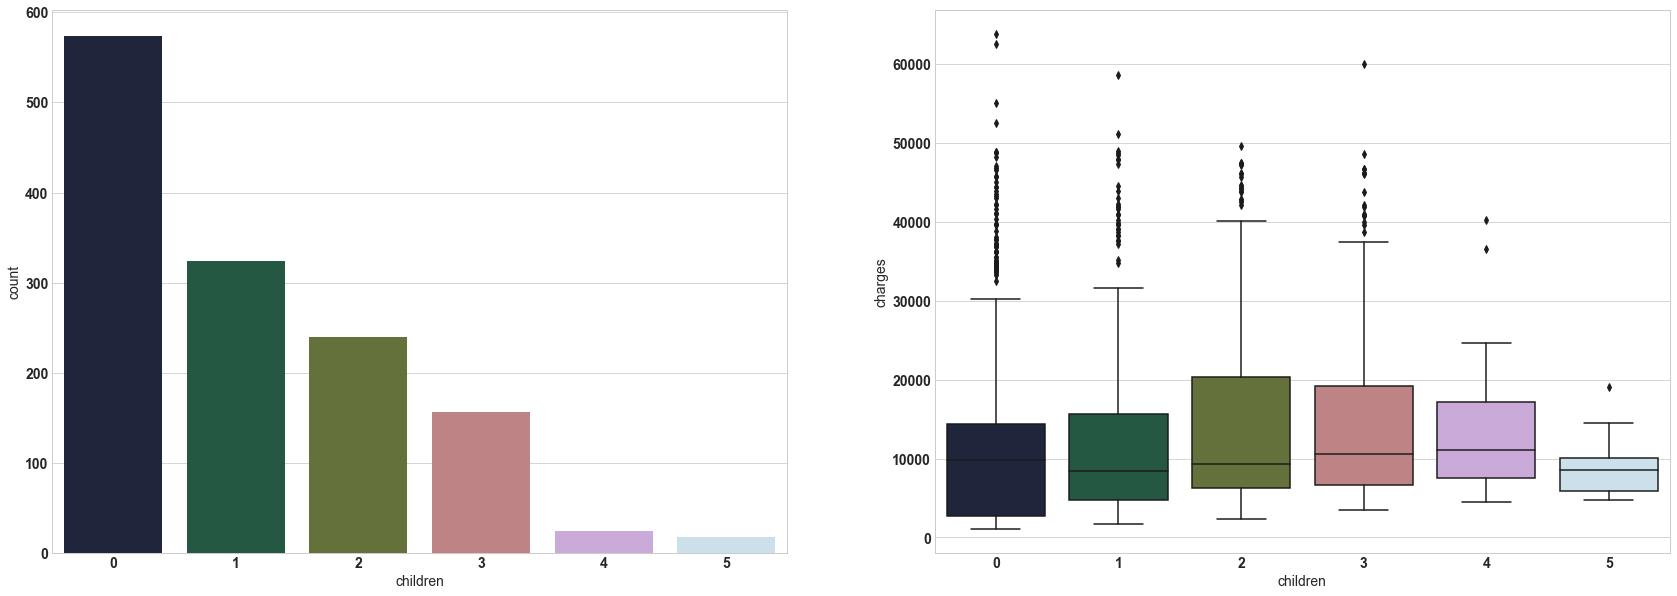

In [30]:
plt.figure(figsize=(29,10))
plt.subplot(1,2,1)
sns.countplot(x = df.children, palette=("cubehelix"))
plt.subplot(1,2,2)
sns.boxplot(x = df.children, y = df.charges,palette=("cubehelix"))
plt.show()

From left plot the insurance charge for male and female is approximatley in same range,it is average around 5000 bucks. In right plot the insurance charge for smokers is much wide range compare to non smokers, the average charges for non smoker is approximately 5000 bucks. For smoker the minimum insurance charge is itself 5000 bucks.

In [31]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='charges'>

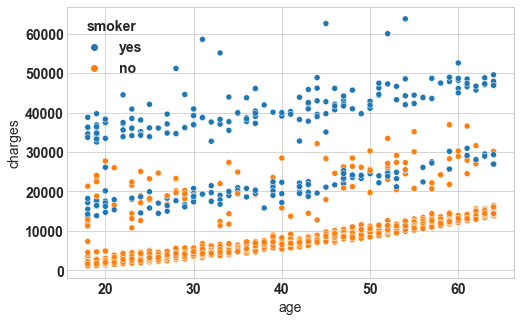

In [32]:
sns.scatterplot('age', 'charges', data =df, hue='smoker')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi', ylabel='charges'>

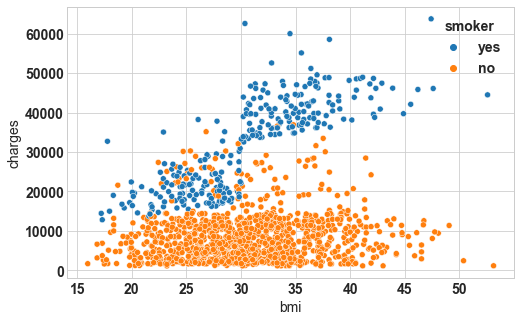

In [33]:
sns.scatterplot('bmi','charges', data=df, hue='smoker')

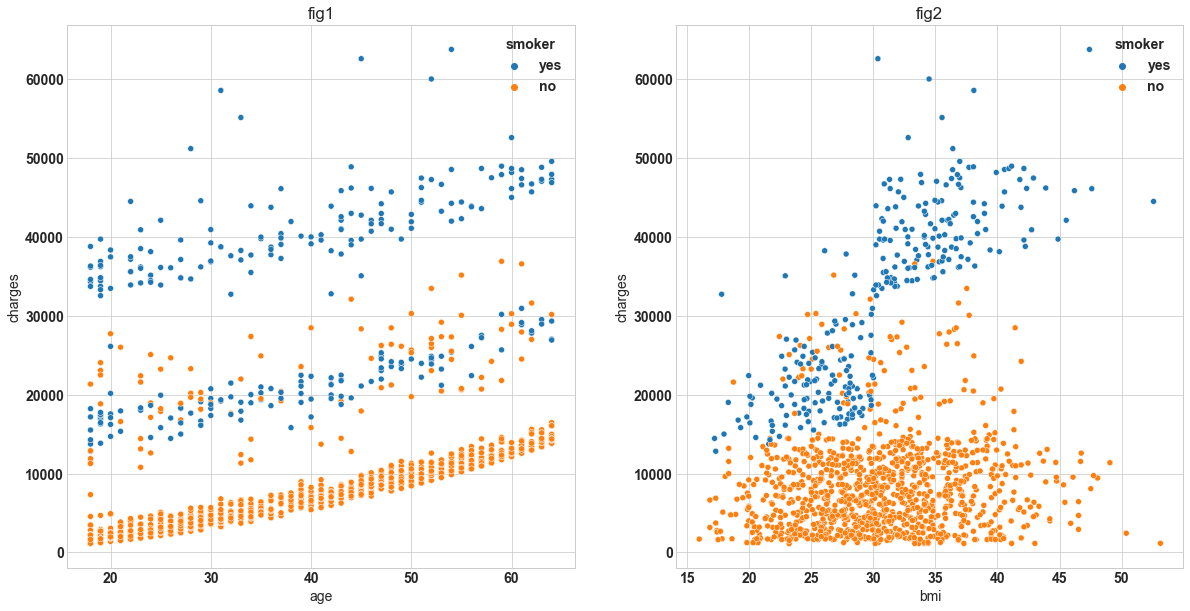

In [34]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.scatterplot(x ='age', y ='charges', data =df, hue='smoker')
plt.title('fig1')
plt.subplot(1,2,2)
sns.scatterplot(x='bmi',y='charges', data=df, hue='smoker')
plt.title('fig2')
plt.show()

From left plot the minimum age person is insured is 18 year. There is slabs in policy most of non smoker take  1𝑠𝑡  and  2𝑛𝑑  slab, for smoker policy start at  2𝑛𝑑  and  3𝑟𝑑  slab.

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. The minimum bmi is 16 𝑘𝑔/𝑚2  and maximum upto 54 𝑘𝑔/𝑚2

In [35]:
#lets do encoding
ef = df.copy()
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [36]:
#encoding
cat = ['sex','children', 'smoker', 'region']
df_en = pd.get_dummies(data=ef, columns= cat, drop_first= True, dtype='int8')

In [37]:
df_en.head(2)

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,16884.9240,0,0,0,0,0,0,1,0,0,1
1,18,33.77,1725.5523,1,1,0,0,0,0,0,0,1,0


In [38]:
df_en['charges']= np.log(df_en['charges'])

In [39]:
df_en

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,9.734176,0,0,0,0,0,0,1,0,0,1
1,18,33.770,7.453302,1,1,0,0,0,0,0,0,1,0
2,28,33.000,8.400538,1,0,0,1,0,0,0,0,1,0
3,33,22.705,9.998092,1,0,0,0,0,0,0,1,0,0
4,32,28.880,8.260197,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,9.268661,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,7.698927,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,7.396233,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,7.604867,0,0,0,0,0,0,0,0,0,1


In [40]:
dfn = df_en.copy()
y = df_en.pop('charges')
X = df_en

In [41]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y , test_size=0.3, random_state= 23)

In [42]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(X_train,y_train)

LinearRegression()

In [43]:
print(ln.coef_)
print(ln.intercept_)

[ 0.03313425  0.01351684 -0.06776735  0.14945669  0.27291869  0.24409489
  0.52333863  0.46603008  1.55048077 -0.05584487 -0.14657831 -0.13350812]
7.059171468417669


In [44]:
ln.score(X_train,y_train)

0.7644299030173098

In [46]:
pred = ln.predict(X_test)

<AxesSubplot:ylabel='charges'>

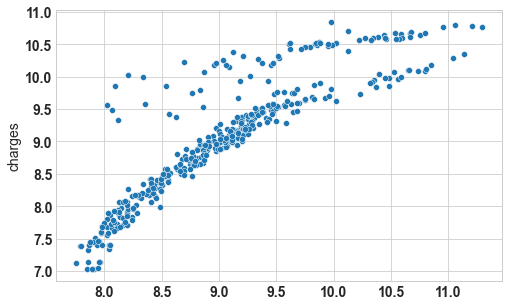

In [47]:
sns.scatterplot(x = pred, y= y_test)

In [48]:
ln.score(X_test,y_test)

0.7795687545055316

# model2

In [49]:
ef = dfn.copy()

In [51]:
ef.head(2)

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,9.734176,0,0,0,0,0,0,1,0,0,1
1,18,33.77,7.453302,1,1,0,0,0,0,0,0,1,0


In [52]:
#Train-Test Split and feature scaling
from sklearn.model_selection import train_test_split
df_train ,df_test = train_test_split(ef, test_size=0.3,random_state=100)

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [55]:
num_var = ['age','bmi','charges']
df_train[num_var]= scaler.fit_transform(df_train[num_var])

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [57]:
df_train.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
966,0.717391,0.237692,0.757791,1,0,1,0,0,0,1,1,0,0
522,0.717391,0.483051,0.538111,0,0,0,0,0,0,0,0,0,0
155,0.565217,0.633844,0.451343,1,0,0,0,0,0,0,1,0,0
671,0.239130,0.408932,0.311139,0,0,0,0,0,0,0,0,0,0
1173,0.434783,0.357815,0.433210,1,0,1,0,0,0,0,1,0,0


In [59]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,936.0,0.458171,0.306065,0.0,0.173913,0.456522,0.717391,1.0
bmi,936.0,0.399088,0.167115,0.0,0.277441,0.391176,0.512039,1.0
charges,936.0,0.510505,0.228701,0.0,0.347605,0.522013,0.665180,1.0
sex_male,936.0,0.497863,0.500263,0.0,0.000000,0.000000,1.000000,1.0
children_1,936.0,0.236111,0.424918,0.0,0.000000,0.000000,0.000000,1.0
children_2,936.0,0.184829,0.388366,0.0,0.000000,0.000000,0.000000,1.0
children_3,936.0,0.117521,0.322213,0.0,0.000000,0.000000,0.000000,1.0
children_4,936.0,0.021368,0.144683,0.0,0.000000,0.000000,0.000000,1.0
children_5,936.0,0.011752,0.107826,0.0,0.000000,0.000000,0.000000,1.0
smoker_yes,936.0,0.194444,0.395984,0.0,0.000000,0.000000,0.000000,1.0


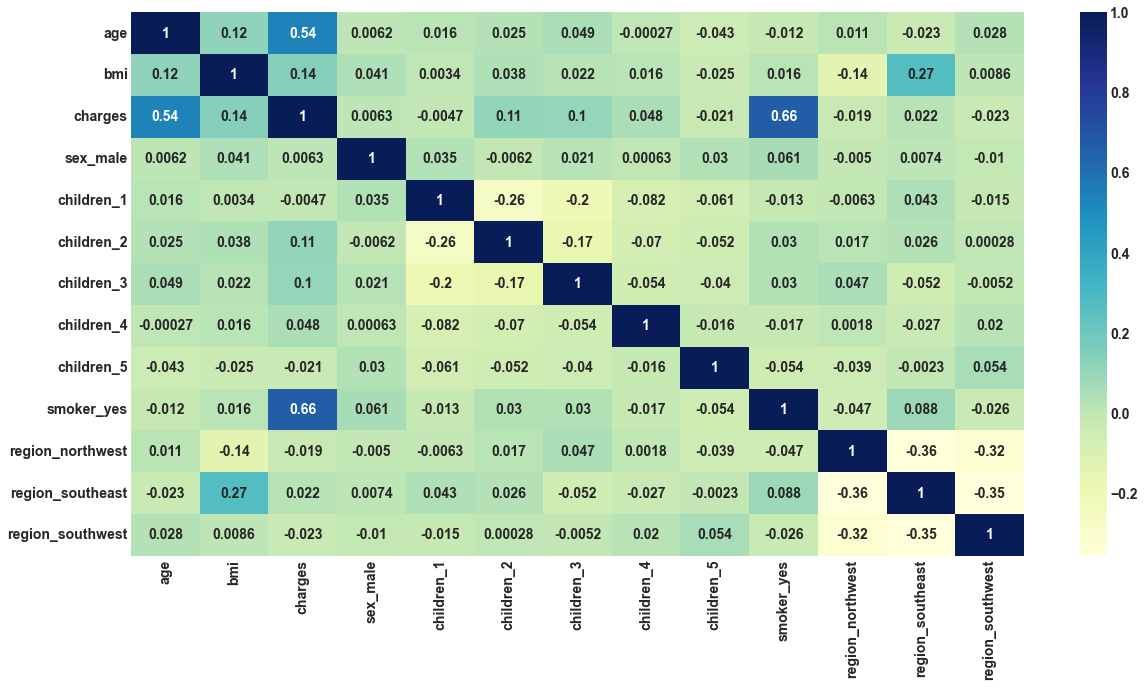

In [63]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(), annot = True,cmap="YlGnBu")
plt.show()

In [64]:
#Dividing data into X and y variables
y_train = df_train.pop('charges')
X_train = df_train

In [65]:
# Model Building
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 6)
rfe = rfe.fit(X_train,y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [71]:
rfe.support_

array([ True,  True, False, False, False,  True,  True,  True,  True,
       False, False, False])

In [73]:
X_train.columns

Index(['age', 'bmi', 'sex_male', 'children_1', 'children_2', 'children_3',
       'children_4', 'children_5', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [74]:
X_train.columns[rfe.support_]

Index(['age', 'bmi', 'children_3', 'children_4', 'children_5', 'smoker_yes'], dtype='object')

In [78]:
X_train_nw = X_train[X_train.columns[rfe.support_]]
X_train_nw.head(2)

,age,bmi,children_3,children_4,children_5,smoker_yes
966,0.717391,0.237692,0,0,0,1
522,0.717391,0.483051,0,0,0,0


In [95]:
def build_model(X,y):
    X = sm.add_constant(X)  #adding the constant
    lm =sm.OLS(y,X).fit()  #fitting the model
    print(lm.summary())
    return X






def VIF_score(X):
    vif = pd.DataFrame()
    vif['predictors'] = X.columns
    vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['vif'] = round(vif['vif'], 2)
    
    return(vif)

In [80]:
#first i build mode without using rfe 
X_train
y_train

966     0.757791
522     0.538111
155     0.451343
671     0.311139
1173    0.433210
          ...   
802     0.155534
53      0.870182
350     0.583050
79      0.437511
792     0.220282
Name: charges, Length: 936, dtype: float64

In [93]:
X_train_n = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     243.0
Date:                Tue, 24 May 2022   Prob (F-statistic):          9.67e-276
Time:                        17:14:50   Log-Likelihood:                 720.35
No. Observations:                 936   AIC:                            -1415.
Df Residuals:                     923   BIC:                            -1352.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2138      0.013  

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#from above region_northwest has high pvalue so deletit

In [96]:
VIF_score(X_train)

,predictors,vif
0,age,2.96
1,bmi,5.15
2,sex_male,1.90
3,children_1,1.49
4,children_2,1.40
5,children_3,1.26
6,children_4,1.05
7,children_5,1.03
8,smoker_yes,1.24
9,region_northwest,1.73


In [97]:
X_train_n = X_train.drop('region_northwest', axis=1)

In [ ]:
#model2

In [99]:
X_train_n = build_model(X_train_n,y_train)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     264.2
Date:                Tue, 24 May 2022   Prob (F-statistic):          2.59e-276
Time:                        17:19:38   Log-Likelihood:                 718.82
No. Observations:                 936   AIC:                            -1414.
Df Residuals:                     924   BIC:                            -1356.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2047      0.012  

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#remove the sex_male hving0.05 pvalue            

In [100]:
VIF_score(X_train_n)

,predictors,vif
0,const,10.41
1,age,1.02
2,bmi,1.12
3,sex_male,1.01
4,children_1,1.19
5,children_2,1.17
6,children_3,1.14
7,children_4,1.03
8,children_5,1.02
9,smoker_yes,1.02


In [ ]:
X_train

In [101]:
# Residual Analysis of Model

In [103]:
lm = sm.OLS(y_train, X_train_n).fit()
y_train_pred = lm.predict(X_train_n)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


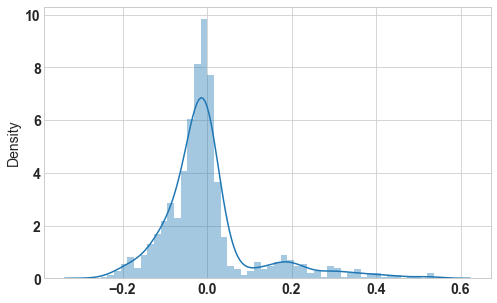

In [107]:
# Plot the histogram of the error terms
error = y_train - y_train_pred
sns.distplot(error)
plt.show()

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled

In [108]:
#Prediction and Evaluation

In [111]:
num = ['age','bmi','charges']
df_test[num] = scaler.fit_transform(df_test[num])

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [112]:
y_test = df_test.pop('charges')
X_test = df_test

In [119]:
# Now let's use our model to make predictions.
X_train_n = X_train_n.drop('const',axis=1)


KeyError: "['const'] not found in axis"

In [120]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_n = X_test[X_train_n.columns]

# Adding a constant variable 
X_test_n = sm.add_constant(X_test_n)

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [123]:
#now test set ready to predction
y_test_pred = lm.predict(X_test_n)


In [126]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7946591679442933

Text(0, 0.5, 'y_pred')

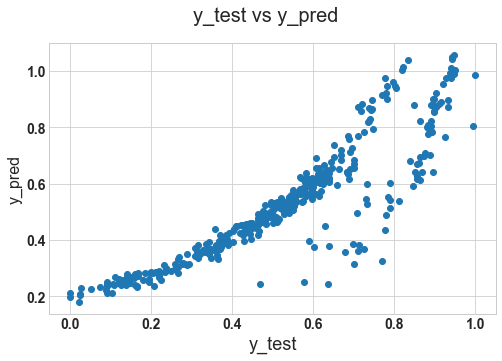

In [127]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [128]:
#Evaluation of the model using Statistics

In [130]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     264.2
Date:                Tue, 24 May 2022   Prob (F-statistic):          2.59e-276
Time:                        17:41:35   Log-Likelihood:                 718.82
No. Observations:                 936   AIC:                            -1414.
Df Residuals:                     924   BIC:                            -1356.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2047      0.012  

Inference :
R-sqaured and Adjusted R-squared (extent of fit) - 0.759 and 0.756 - 90% variance explained.
F-stats and Prob(F-stats) (overall model fit) - 264.2 and 1.04e-67(approx. 0.0) - Model fir is significant and explained 76% variance is just not by chance.
p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

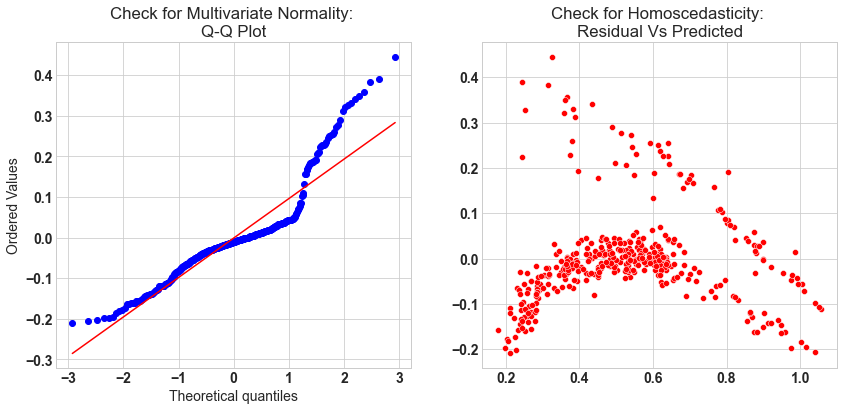

In [133]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_test_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_test_pred), x= y_test_pred, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [135]:
#now check the model for predictors we got from ref
X_train_nw1 = build_model(X_train_nw,y_train)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     447.2
Date:                Tue, 24 May 2022   Prob (F-statistic):          6.91e-270
Time:                        17:55:35   Log-Likelihood:                 688.81
No. Observations:                 936   AIC:                            -1364.
Df Residuals:                     929   BIC:                            -1330.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2082      0.011     18.709      0.0

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [136]:
X_train_nw1 = X_train_nw1.drop('children_5', axis = 1)

In [137]:
X_train_nw1 = build_model(X_train_nw1,y_train)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     532.1
Date:                Tue, 24 May 2022   Prob (F-statistic):          7.41e-270
Time:                        17:56:56   Log-Likelihood:                 685.52
No. Observations:                 936   AIC:                            -1359.
Df Residuals:                     930   BIC:                            -1330.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2107      0.011     18.949      0.0

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [140]:
lm = sm.OLS(y_train,X_train_nw1).fit()

In [141]:
y_prd = lm.predict(X_train_nw1)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

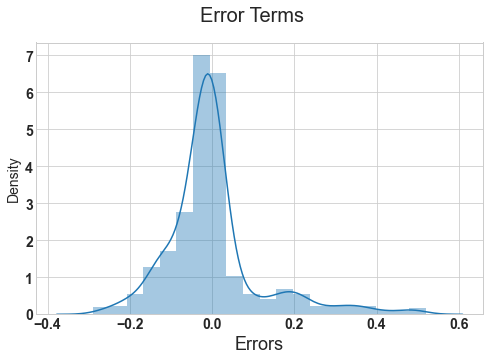

In [142]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_prd), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [148]:
X_train_nw1.columns

Index(['const', 'age', 'bmi', 'children_3', 'children_4', 'smoker_yes'], dtype='object')

In [151]:
X_dumy = X_train_nw1.drop('const', axis=1)

In [153]:
X_test_nw = X_test[X_dumy.columns]

In [155]:
#preidiction for test
X= sm.add_constant(X_test_nw)
y_pre = lm.predict(X)

In [157]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pre)

0.7732107645840518

Text(0, 0.5, 'y_pred')

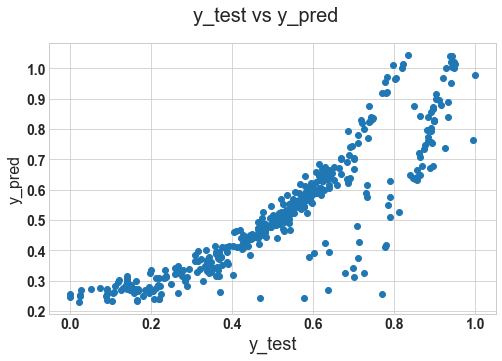

In [160]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pre)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

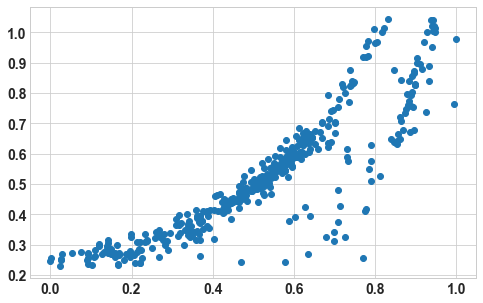

In [161]:
plt.scatter(y_test, y_pre)

In [163]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     532.1
Date:                Tue, 24 May 2022   Prob (F-statistic):          7.41e-270
Time:                        18:11:57   Log-Likelihood:                 685.52
No. Observations:                 936   AIC:                            -1359.
Df Residuals:                     930   BIC:                            -1330.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2107      0.011     18.949      0.0